## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## EDA and Preprocessing

In [2]:
df = pd.read_csv('/content/sample_data/blogs.csv')

In [3]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
df.shape

(2000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [8]:
df.isnull().sum()   #no null values detected

,0
Data,0
Labels,0


In [10]:
df.duplicated().sum()  #no duplicates found

0

In [11]:
df.Labels.value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)    # Removing punctuations and numbers
    text = text.lower()                        # Converting to lowercase
    tokens = word_tokenize(text)               # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]    # Removing stopwords
    text = ' '.join(tokens)                    # Joining tokens back into a single string
    return text


df['cleaned_text'] = df['Data'].apply(preprocess_text)
print(df[['Data', 'cleaned_text']].head())


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [20]:
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['Labels']

In [21]:
print(f"TF-IDF features shape: {X.shape}")

TF-IDF features shape: (2000, 5000)


## Naive Bayes Model for Text Classification

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (1600, 5000), Training labels shape: (1600,)
Test data shape: (400, 5000), Test labels shape: (400,)


In [24]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_pred = nb_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8425
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.8

## Sentiment Analysis

In [27]:
from textblob import TextBlob

def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'


df['Sentiment'] = df['Data'].apply(get_sentiment)
print(df[['Data', 'Sentiment']].head())


                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


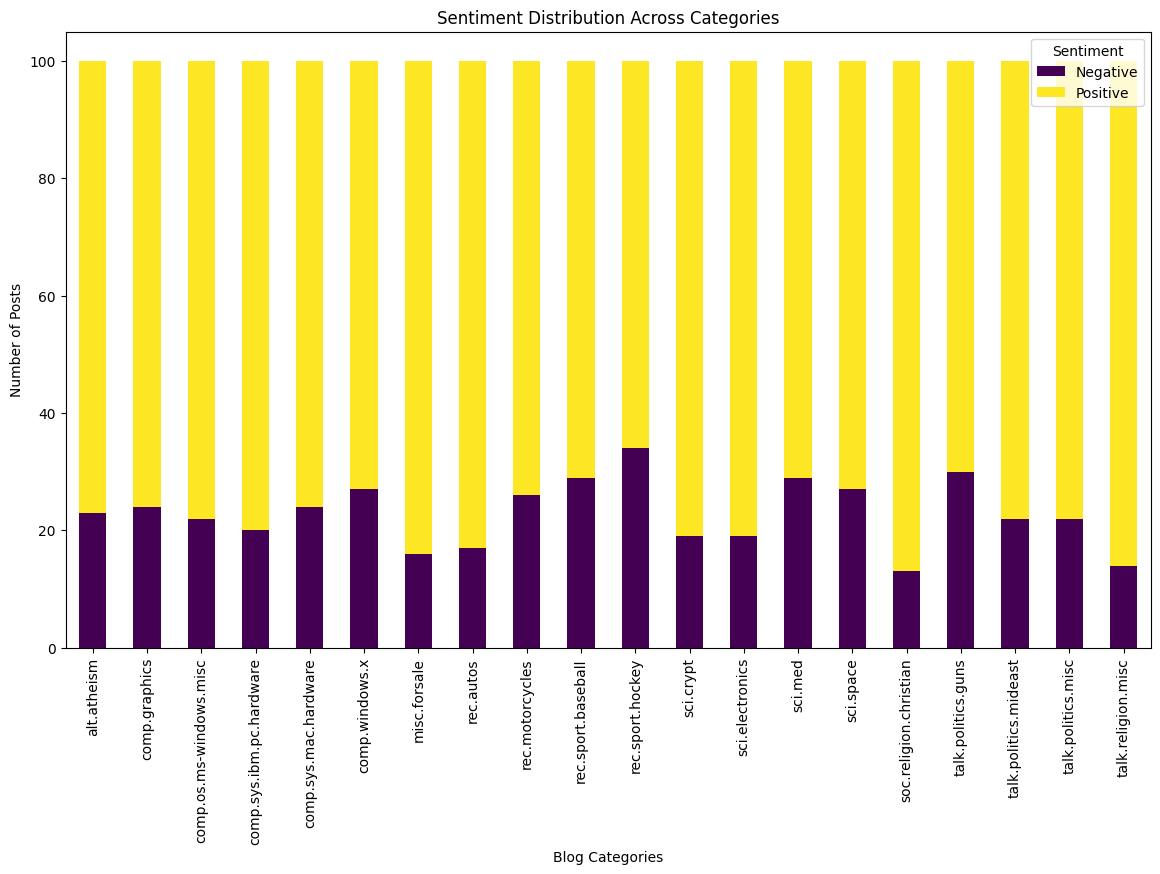

In [28]:
# Grouping by Labels and Sentiment to see the distribution
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Plotting the sentiment distribution for each category
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Blog Categories')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.show()


In [29]:
summary = sentiment_distribution.describe()
print(summary)

Sentiment   Negative   Positive
count      20.000000  20.000000
mean       22.850000  77.150000
std         5.593935   5.593935
min        13.000000  66.000000
25%        19.000000  73.000000
50%        22.500000  77.500000
75%        27.000000  81.000000
max        34.000000  87.000000


In [30]:
# Examining the overall distribution of sentiments
overall_sentiment = df['Sentiment'].value_counts(normalize=True) * 100
print("Overall Sentiment Distribution (%):\n", overall_sentiment)

Overall Sentiment Distribution (%):
 Sentiment
Positive    77.15
Negative    22.85
Name: proportion, dtype: float64


## Evaluation
1. Model Performance:
  
  a. Accuracy: An accuracy of 84.25% was observed.
  
  b. Precision/Recall: Was seen higher in some categories (e.g., rec.motorcycles), lower in others (e.g., talk.religion.misc).
  
  c. Challenges faced: Misclassifications were seen in similar categories and poor performance in certain labels.

2. Sentiment Analysis:

  a. Distribution: A distribution of 77% positive and 23% negative was observed.

  b. Implications: Blog posts generally express positive sentiments, which may influence content strategy and moderation.